# MACHINE LEARNING - TAREFAS DE REGRESSÃO

Nesta aula iremos aplicar na prática os conceitos aprendidos sobre aprendizado de máquina. Para isso, iremos utilizar o **Scikit-Learn**, que é uma das bibliotecas mais poderosas e completas para machine learning em Python. Ela também contém ferramentas simples e eficientes para a mineração de dados e análise de dados.

Para instalar o sklearn basta utilizar o comando: **pip install -U scikit-learn**

# Prevendo o preço de uma pizza de acordo com o seu diâmetro

Nossa objetivo é prever o preço de uma pizza com base em pizzas passadas que compramos. Como já dito anteriormente, para criar um modelo preditivo é preciso ter um conjunto de dados passados, então, os dados das pizzas que compramos em dias anteriores, será o nosso conjunto de dados. Observe:

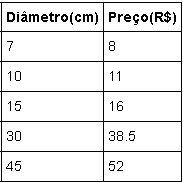

In [73]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Diâmetros (cm)
Diametros = np.array([7, 10, 15, 30, 45])
# Preços (R$)
Precos = np.array([8, 11, 16, 38.5, 52])

**Analisando os rotulos**

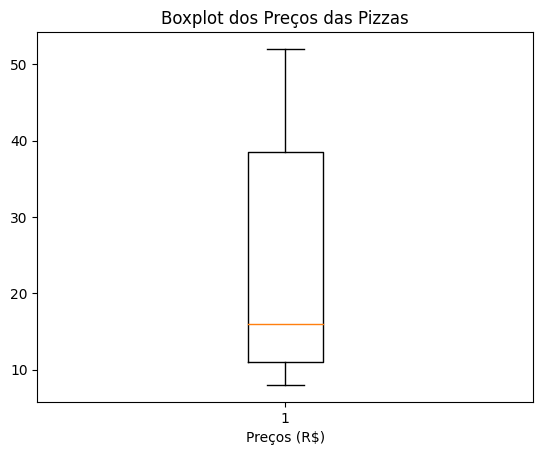

In [76]:
plt.boxplot(Precos, vert=True)
plt.title('Boxplot dos Preços das Pizzas')
plt.xlabel('Preços (R$)')
plt.show()

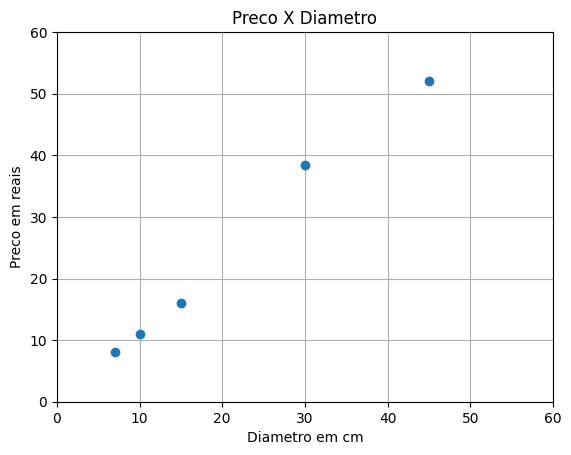

In [77]:
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Preco X Diametro')
plt.plot(Diametros,Precos,'o')
plt.axis([0,60,0,60])
plt.grid()
plt.show()

## Criando nosso primeiro modelo de Regressão

**Importação**

In [78]:
# pip install scikit-learn
from sklearn import linear_model

**Criando o modelo**

In [79]:
modelo = linear_model.LinearRegression()

In [81]:
#Mudando o formato do array onde cada linha representa um exemplo
Diametros = np.reshape(Diametros,(-1,1))

**Treinamento do modelo (FIT)**

Para treinar nosso modelo precisamos passar os dados e seus respectivos rotulos.

In [87]:
modelo.fit(Diametros,Precos)

LinearRegression()

In [88]:
teste = np.array([20, 25, 37]).reshape(-1,1)

**Fazendo uma previsão (PREDICT)**

In [89]:
modelo.predict(teste)

array([23.41409037, 29.4351962 , 43.88585018])

### Prevendo os preços já conhecidos e entendendo como a previsão está sendo feita

In [90]:
# preços conhecidos
print(Diametros.reshape(1,-1))
print(Precos)

[[ 7 10 15 30 45]]
[ 8.  11.  16.  38.5 52. ]


In [91]:
# preços preditos
modelo.predict(Diametros)

array([ 7.75921522, 11.37187872, 17.39298454, 35.45630202, 53.5196195 ])

**Equacao da reta: y = ax + b**

- y: É a variável dependente. Representa o valor no eixo vertical (ordenada) para um dado valor de x.
- x: É a variável independente. Representa o valor no eixo horizontal (abscissa).
- a: É o coeficiente angular da reta, também conhecido como inclinação. Ele indica a inclinação da reta e como y muda em relação a x. Em outras palavras, é a taxa de variação de y com relação a x. Se a for positivo, a reta sobe da esquerda para a direita; se for negativo, a reta desce da esquerda para a direita.
- b: É o coeficiente linear da reta, também conhecido como o intercepto. Ele indica o ponto onde a reta cruza o eixo y.

In [92]:
print('a = ' + str(modelo.coef_))
print('b = ' + str(modelo.intercept_))

a = [1.20422117]
b = -0.6703329369797864


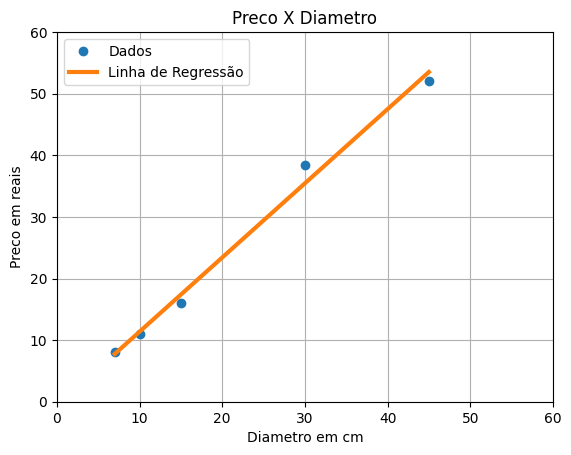

In [93]:
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Preco X Diametro')
plt.plot(Diametros,Precos,'o', label='Dados')
plt.plot(Diametros,modelo.predict(Diametros),linewidth=3, label='Linha de Regressão')
plt.axis([0,60,0,60])
plt.grid()
plt.legend()
plt.show()

## Avaliando nosso modelo

Para avaliar nosso modelo podemos utilizar métricas de desempenho como por exemplo o **mean_squared_error (Erro Médio Quadrático)** que é uma métrica comumente usada para avaliar a qualidade de modelos de regressão em aprendizado de máquina pois quantifica o quão próximo as previsões de um modelo estão dos valores reais (ou alvos) em um conjunto de dados. Quanto menor o valor do erro médio quadrático, melhor o desempenho do modelo.

A fórmula do mean_squared_error é a seguinte:

mean_squared_error(y_true, y_pred) = (1/n) * Σ(y_true - y_pred)²

* y_true: São os valores reais do alvo no conjunto de dados.
* y_pred: São as previsões feitas pelo modelo.
* "Σ" indica a soma.
* "n" é o número total de exemplos no conjunto de dados.

A fórmula calcula a média dos quadrados das diferenças entre os valores reais (y_true) e as previsões do modelo (y_pred). Essa média de quadrados é uma medida da dispersão dos erros do modelo. Quanto menor for o valor, mais próximas as previsões estão dos valores reais, indicando um melhor desempenho do modelo.

In [94]:
from sklearn.metrics import mean_squared_error
print("Mean squared error:")
mean_squared_error(Precos,modelo.predict(Diametros))

Mean squared error:


2.7420035671819223

**Coeficiente de Determinação (R²)**: O R² mede a proporção da variabilidade nos dados explicada pelo modelo. Um R² mais próximo de 1 indica que o modelo explica uma grande parte da variação nos dados.

In [95]:
from sklearn.metrics import r2_score
print("R2:")
r2_score(Precos,modelo.predict(Diametros))

R2:


0.9907189156269228

# Treinando um modelo de regressão polinomial

Treinar um modelo de regressão polinomial envolve a criação de um modelo que pode capturar relações não lineares entre as variáveis independentes (características) e a variável de resposta (alvo).

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# PolynomialFeatures é utilizado para transformar as características em características polinomiais. 
# Você define o grau do polinômio desejado, o que determinará quantos termos polinomiais serão gerados.
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(Diametros.reshape(-1,1))

# Criando e Treinando o modelo
modelo_polinomial = Ridge().fit(x_poly, Precos)

# Avaliando o desempenho do modelo
print("Mean squared error = ", mean_squared_error(Precos,modelo_polinomial.predict(x_poly)))
r2_score(Precos,modelo_polinomial.predict(x_poly))

Mean squared error =  0.056535792728938605


0.9998086386652825

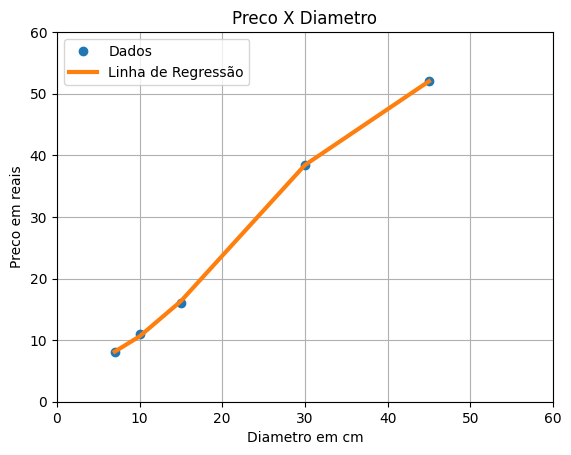

In [99]:
# Plotando uma comparação entre os preços conhecidos e preços previstos
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Preco X Diametro')
plt.plot(Diametros,Precos,'o', label='Dados')
plt.plot(Diametros,modelo_polinomial.predict(x_poly),linewidth=3, label='Linha de Regressão')
plt.axis([0,60,0,60])
plt.grid()
plt.legend()
plt.show()

## Utilizando o make_pipeline

In [100]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
modelo_polinomial = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial.fit(Diametros, Precos)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [101]:
print("Mean squared error = ", mean_squared_error(Precos,modelo_polinomial.predict(Diametros)))

Mean squared error =  0.056535792728938605


---------------------------
# Regressão para a estimação do preço de casas utilizando o Dataset California Housing
--------------------------

In [21]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [22]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [23]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

**Convertendo o dataset em um DataFrame pandas**

In [105]:
import pandas as pd

atributos_casas = pd.DataFrame(housing.data)
atributos_casas

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [25]:
# Adicionando o título das colunas
atributos_casas.columns = housing.feature_names
atributos_casas.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [106]:
# Pegando os precos das casas
preco_casas = pd.DataFrame(housing.target)

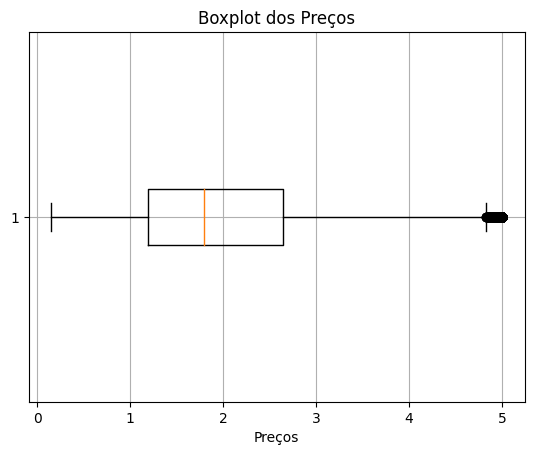

In [107]:
# Analisando a variavel dependente, observe que a base possui outliers
plt.boxplot(preco_casas, vert=False)
plt.title('Boxplot dos Preços')
plt.xlabel('Preços')
plt.grid()
plt.show()

## Dividindo os dados em treino e teste

In [110]:
from sklearn.model_selection import train_test_split

atributos_treino, atributos_teste, preco_treino, preco_teste = train_test_split(atributos_casas, preco_casas, test_size=0.3, random_state=42)

# Utilizando o Linear Regression

In [111]:
modelo_linear_regression = linear_model.LinearRegression()

In [112]:
modelo_linear_regression.fit(atributos_treino,preco_treino)

LinearRegression()

In [113]:
print("Mean squared error = ", mean_squared_error(preco_teste,modelo_linear_regression.predict(atributos_teste)))
print("R2 Score =  ", r2_score(preco_teste,modelo_linear_regression.predict(atributos_teste)))

Mean squared error =  0.530567782476675
R2 Score =   0.5957702326061666


In [67]:
# Realizando uma predição
indice = 200
print("Valor predito = ", modelo_linear_regression.predict([atributos_teste.iloc[indice]]))
print("Preco real = ", preco_teste.iloc[indice][0])

Valor predito =  [[2.39908647]]
Preco real =  2.979


C:\Users\rafa_\anaconda3\envs\rafael\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Utilizando o modelo de regressão polinomial

In [128]:
degree = 2

modelo_polinomial_casas = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial_casas.fit(atributos_treino, preco_treino)

C:\Users\rafa_\anaconda3\envs\rafael\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.67635e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [129]:
print("Mean squared error = ", mean_squared_error(preco_teste,modelo_polinomial_casas.predict(atributos_teste)))
print("R2 Score =  ", r2_score(preco_teste,modelo_polinomial_casas.predict(atributos_teste)))

Mean squared error =  0.42879978842504146
R2 Score =   0.6733053825385644


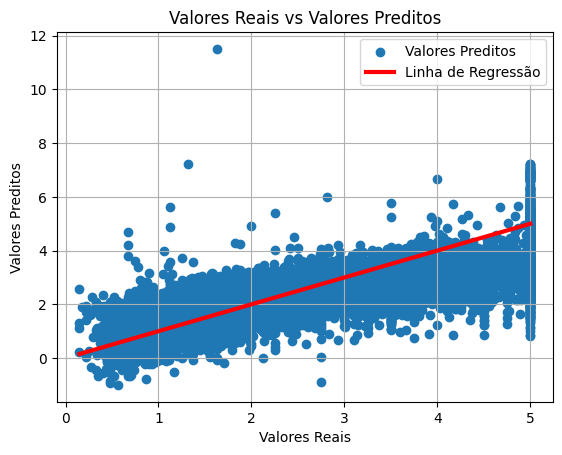

In [131]:
# Plotando valores preditos (azul) e valores reais (verde)
valores_preditos = modelo_linear_regression.predict(atributos_casas)
plt.figure()
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Valores Preditos')
# plt.scatter(preco_casas[0:200], valores_preditos[0:200], label='Valores Preditos')
plt.scatter(preco_casas, valores_preditos, label='Valores Preditos')
plt.plot([preco_casas.min(), preco_casas.max()], [preco_casas.min(), preco_casas.max()], color='red', linestyle='-', linewidth=3, label='Linha de Regressão')
plt.legend()
plt.grid()
plt.show()

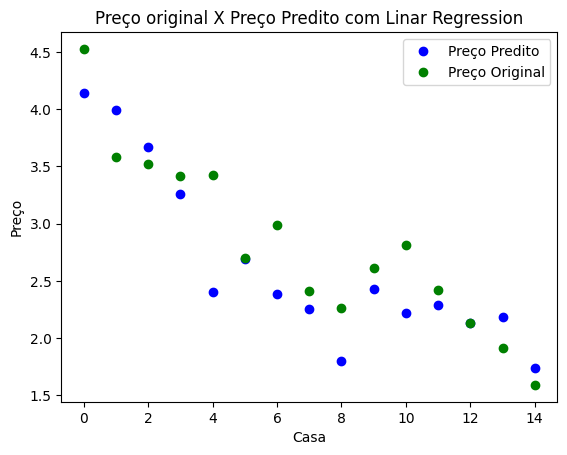

In [132]:
plt.title("Preço original X Preço Predito com Linar Regression")
plt.plot(modelo_linear_regression.predict(atributos_casas[0:15]),'bo', label="Preço Predito")
plt.plot(preco_casas[0:15],'go', label="Preço Original")
plt.ylabel('Preço')
plt.xlabel('Casa')
plt.legend()
plt.show()

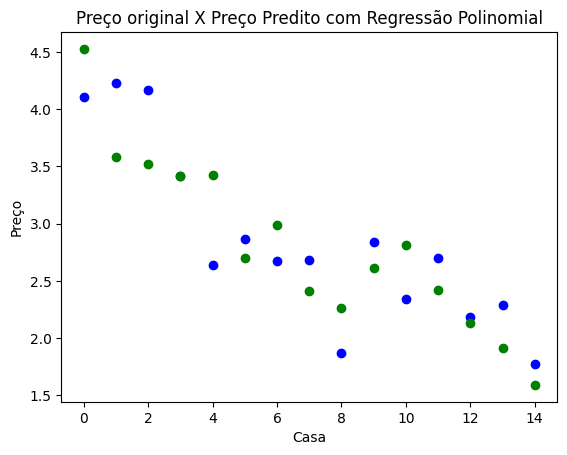

In [72]:
plt.title("Preço original X Preço Predito com Regressão Polinomial")
plt.plot(modelo_polinomial_casas.predict(atributos_casas[0:15]),'bo')
plt.plot(preco_casas[0:15],'go')
plt.ylabel('Preço')
plt.xlabel('Casa')
plt.show()